## Hidden Markov Models 
Learn how to use `hmmlearn` and use it to:
1. generate data 
2. fit models to the data
3. run classification on the fake data

Then move to DTW; then to real world data.  

In [66]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

### Generate data

#### Test: How it works?

In [67]:
np.random.seed(42)
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag")

# Vector pi; shape: (n_components,)
model.startprob_ = np.array([0.9, 0.1]) 

# Matrix A; shape: (n_components, n_components)
model.transmat_ = np.array([[0.9, 0.1],
                            [0.1, 0.9]])

# Emission distribution means (Gaussian); shape: (n_components, n_features)
model.means_ = np.array([[0], [3]])

# Emission distribution covariation matrix? (Gaussian); shape: (n_components, n_features)
# Shape depends on type of covariance matrix and for some there's a need to manually set n_features (bug)
model.covars_ = np.array([[0.1], [0.5]])
X, Z = model.sample(50)

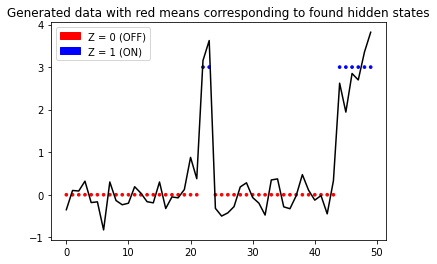

In [68]:
# Data
means = [model.means_[i] for i in Z]
colors = ["red" if z==0 else "blue" for z in Z]
# Legend
red_patch = mpatches.Patch(color = 'red', label = 'Z = 0 (OFF)')
blue_patch = mpatches.Patch(color = 'blue', label = 'Z = 1 (ON)')

plt.plot(X, color = "black")
plt.scatter(np.array(range(len(Z))), means, color = colors, s = 7)
plt.title("Generated data with red means corresponding to found hidden states")
plt.legend(handles=[red_patch, blue_patch])

#### Different models for classification